# Dataset

Dataset contains football, volleyball, rugby ball, tennis ball images.

You can download dataset from [this link](https://drive.google.com/file/d/1t7tK3R3PprlkjKRLEiuk0HU4L1WYp1tP/view?usp=sharing)

# Loading dataset

In [46]:
import torch

torch.cuda.is_available()
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 32           |        cudaMalloc retries: 44        |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      | 602067 KiB |   3634 MiB |   1854 GiB |   1853 GiB |\n|       from large pool | 566468 KiB |   3558 MiB |   1850 GiB |   1850 GiB |\n|       from small pool |  35599 KiB |     94 MiB |      3 GiB |      3 GiB |\n|---------------------------------------------------------------------------|\n| Active memory         | 602067 KiB |   3634 MiB |   1854 GiB |   1853 GiB |\n|       from large pool | 566468 KiB |   3558 MiB |

In [47]:
import pandas as pd
from glob import glob

images = glob('data/*/*.jpg')

df = pd.DataFrame({'path': images})

df

,path
0,data/Volleyball/a30447a5ee9cb57b.jpg
1,data/Volleyball/88940ebcd4231f32.jpg
2,data/Volleyball/a61976b909efc09d.jpg
3,data/Volleyball/8b674a337a0fa3a9.jpg
4,data/Volleyball/018e2d73ab9b2b81.jpg
...,...
886,data/Tennis ball/2cde75e26b21c24f.jpg
887,data/Tennis ball/0fcefca205aa7d1f.jpg
888,data/Tennis ball/913e0a0f55108c65.jpg
889,data/Tennis ball/33a25d8a6bf9e797.jpg


In [48]:
labels = ['Football', 'Tennis ball', 'Volleyball']

for label in labels:
    df.loc[df.path.str.contains(label), 'label'] = label

df

,path,label
0,data/Volleyball/a30447a5ee9cb57b.jpg,Volleyball
1,data/Volleyball/88940ebcd4231f32.jpg,Volleyball
2,data/Volleyball/a61976b909efc09d.jpg,Volleyball
3,data/Volleyball/8b674a337a0fa3a9.jpg,Volleyball
4,data/Volleyball/018e2d73ab9b2b81.jpg,Volleyball
...,...,...
886,data/Tennis ball/2cde75e26b21c24f.jpg,Tennis ball
887,data/Tennis ball/0fcefca205aa7d1f.jpg,Tennis ball
888,data/Tennis ball/913e0a0f55108c65.jpg,Tennis ball
889,data/Tennis ball/33a25d8a6bf9e797.jpg,Tennis ball


In [49]:
from fastai.vision.all import ImageDataLoaders, Resize

dls = ImageDataLoaders.from_df(df.values, seed=42, item_tfms=Resize((240, 240)))

In [50]:
from fastai.vision.all import vision_learner, resnet34, accuracy

learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.210060,0.148876,0.938202,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.276791,0.126384,0.960674,00:06
1,0.181471,0.135425,0.943820,00:06
2,0.119911,0.121825,0.949438,00:06


In [51]:
learn.export('models/ball-classifier.pkl')

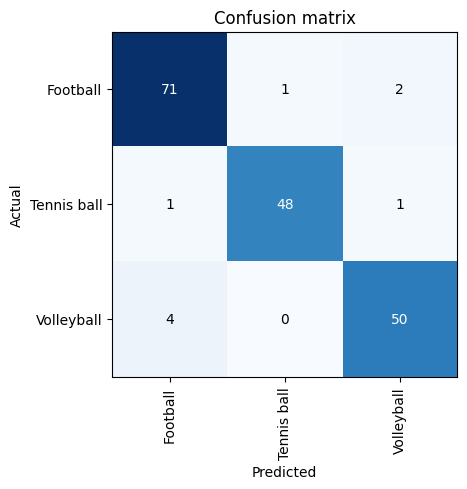

In [52]:
from fastai.vision.all import ClassificationInterpretation

inter = ClassificationInterpretation.from_learner(learn)
inter.plot_confusion_matrix()